In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML # 화면 좌우 크기 100%
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt

%matplotlib inline
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [18]:
from sklearn.datasets import fetch_20newsgroups
# LDA는 빈도수에만 기반하는 CountVectorizer사용함!
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 주어진 데이터셋의 일부 카테고리 데이터만 추출하므로 카테고리 사전에 설정
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x']
# 설정해준 카테고리의 데이터들만 추출
news_df = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'),
                            categories=cats, random_state=12)
# CountVectorizer로 텍스트 데이터들 단어 빈도수에 기반해 벡터화시키기(fit_transform까지!)
count_vect = CountVectorizer(max_df=0.95, max_features=1000,
                            min_df=2, stop_words='english',
                            ngram_range=(1,2))
ftr_vect = count_vect.fit_transform(news_df.data)

In [19]:
pd.DataFrame(ftr_vect.toarray())

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
lda.fit(ftr_vect.toarray())
# components_속성은 8개의 토픽별(row)로 1000개의 feature(단어)들의 분포수치(column)를 보여줌
print(lda.components_.shape)
print(lda.components_)

LatentDirichletAllocation(n_components=8, random_state=42)

(8, 1000)
[[4.21886779e+01 1.25077441e-01 1.03902744e+01 ... 3.28675046e+01
  1.25032926e-01 2.23626159e+00]
 [3.31601110e+02 1.13269256e+02 1.62846341e+02 ... 1.38787171e-01
  2.40125634e+02 3.98253576e+00]
 [1.27625269e-01 9.96794709e+01 1.25480119e-01 ... 7.24201742e+00
  1.90971768e+01 5.07321349e+01]
 ...
 [1.25089768e-01 3.89851204e+01 1.25038018e-01 ... 2.14401784e+02
  1.25058173e-01 9.50015891e+01]
 [1.25041718e-01 2.43565827e+02 1.25013778e-01 ... 2.25580117e+01
  2.46882968e+01 4.56696629e+01]
 [1.25067731e-01 1.25058566e-01 1.25000680e-01 ... 1.20416570e+02
  1.25047652e-01 3.96898176e+01]]


In [17]:
from scipy import sparse
sparse.csr_matrix(ftr_vect.toarray())
ftr_vect

<7862x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 207349 stored elements in Compressed Sparse Row format>

<7862x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 207349 stored elements in Compressed Sparse Row format>

In [20]:
# LDA클래스를 이용해서 피처 벡터화시킨 것을 토픽모델링 시키기
# 8개의 주제만 뽑았으니 n_components(토픽개수) 8로 설정
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(ftr_vect)
# components_속성은 8개의 토픽별(row)로 1000개의 feature(단어)들의 분포수치(column)를 보여줌
print(lda.components_.shape)
print(lda.components_)

LatentDirichletAllocation(n_components=3, random_state=42)

(3, 1000)
[[6.69787701e+01 9.34123634e+00 1.96427080e+01 ... 1.34591107e+01
  1.34113378e+01 2.44085190e+01]
 [3.39673670e+02 9.03246926e+01 7.00421968e+01 ... 8.41566455e+01
  1.78348241e+00 1.11232577e+02]
 [3.47559519e-01 3.34071064e-01 3.53150951e+01 ... 3.84243843e-01
  6.48051798e+01 3.58904440e-01]]


In [21]:
# 이 때 lda_model이란, 벡터화시킨 텍스트 데이터를 fit까지만 적용한 모델!
def display_topic_words(lda_model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(lda_model.components_):
        print('\nTopic #', topic_idx+1)
        
        # Topic별로 1000개의 단어들(features)중에서 높은 값 순으로 정렬 후 index를 반환해줌!
        # argsort()는 디폴트가 오름차순임(1,2,3,...) 그래서 [::-1]로 내림차순으로 바꿔주기
        topic_word_idx = topic.argsort()[::-1]
        top_idx = topic_word_idx[:num_top_words]
        
        # CountVectorizer함수 할당시킨 객체에 get_feature_names()로 벡터화시킨 feature(단어들)볼 수 있음!
        # 이 벡터화시킨 단어들(features)은 숫자-알파벳순으로 정렬되며, 단어들 순서는 fit_transform시키고 난 이후에도 동일!
        # '문자열'.join 함수로 특정 문자열 사이에 끼고 문자열 합쳐줄 수 있음.
        feature_concat = '+'.join([str(feature_names[i])+'*'+str(round(topic[i], 1)) for i in top_idx])
        print(feature_concat)        
feature_names = count_vect.get_feature_names()
display_topic_words(lda, feature_names, 15)


Topic # 1
file*1418.6+edu*1221.6+image*1167.0+use*1099.7+graphics*976.2+program*912.5+available*887.9+window*836.0+ftp*760.9+server*750.6+files*719.8+display*672.4+software*628.5+data*616.6+version*605.5

Topic # 2
jpeg*772.1+dos*629.8+bike*494.3+windows*341.1+00*339.7+gif*319.6+03*253.1+02*226.1+04*214.7+new*204.0+lost*193.9+quality*193.4+bit*178.3+won*175.6+color*173.0

Topic # 3
like*902.4+just*878.7+don*865.8+know*780.8+think*682.9+year*608.5+good*597.3+time*580.4+ve*513.9+does*450.7+game*447.1+thanks*423.0+way*421.1+right*381.9+better*373.7


In [22]:
# transform까지 수행하면, 문서별(row)로 토픽들(column)의 분포를 알려줌
doc_topics = lda.transform(ftr_vect)
print(doc_topics.shape)
print(doc_topics[:2])

(3951, 3)
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]


In [24]:
import pandas as pd
# 주어진 내장 텍스트데이터의 문서이름에는 카테고리가 labeling되어있음. 
# 따라서, 카테고리가 무엇인지 아는 상태이니까 어떤 문서들이 어떤 토픽들이 높은지 확인해보자.
# 그리고 그 토픽들이 각각 무엇을 내용으로 하는지 추측해보자.
# 주어진 데이터셋의 filename속성을 이용해서 카테고리값들 가져오기
def get_filename_list(newsdata):
    filename_lst = []
    for file in newsdata.filenames:
        filename_temp = file.split('/')[-2:]
        filename = '.'.join(filename_temp)
        filename_lst.append(filename)
    return filename_lst
 
filename_lst = get_filename_list(news_df)
# Dataframe형태로 만들어보기
topic_names = ['Topic #'+ str(i) for i in range(0,3)]
topic_df = pd.DataFrame(data=doc_topics, columns=topic_names,
                       index=filename_lst)
topic_df.head(20)

,Topic #0,Topic #1,Topic #2
C:\Users\NFSI291\scikit_learn_data\20news_home\20news-bydate-train\rec.motorcycles\103233,0.333333,0.333333,0.333333
C:\Users\NFSI291\scikit_learn_data\20news_home\20news-bydate-train\rec.sport.baseball\102679,0.333333,0.333333,0.333333
C:\Users\NFSI291\scikit_learn_data\20news_home\20news-bydate-train\comp.graphics\38299,0.701541,0.005414,0.293045
C:\Users\NFSI291\scikit_learn_data\20news_home\20news-bydate-train\rec.motorcycles\104428,0.027522,0.031015,0.941463
C:\Users\NFSI291\scikit_learn_data\20news_home\20news-bydate-test\rec.sport.baseball\104956,0.005272,0.027010,0.967718
C:\Users\NFSI291\scikit_learn_data\20news_home\20news-bydate-train\comp.graphics\38265,0.394443,0.011816,0.593741
C:\Users\NFSI291\scikit_learn_data\20news_home\20news-bydate-test\comp.graphics\38923,0.354100,0.176737,0.469163
C:\Users\NFSI291\scikit_learn_data\20news_home\20news-bydate-train\comp.graphics\38371,0.629345,0.005116,0.365539
C:\Users\NFSI291\scikit_learn_data\20news_home\20news-bydate-test\comp.graphics\39010,0.199181,0.789743,0.011076
C:\Users\NFSI291\scikit_learn_data\20news_home\20news-bydate-train\rec.motorcycles\104651,0.042766,0.043958,0.913276


In [11]:
import nltk
text = '여전히 너를 보면 잠들은 너를 보면 우리 처음 만남이 생각나 그댄 여전히 아름다워 여전히 너를 보면 잠들은 너를 보면 우리 처음 만남이 생각나'
wbt_words = text.split(' ')
fdist = nltk.FreqDist(wbt_words)

In [12]:
fdist.max()
fdist.N()
fdist.most_common()
fdist.most_common(3)
fdist[fdist.max()]

'너를'

23

[('너를', 4),
 ('보면', 4),
 ('여전히', 3),
 ('잠들은', 2),
 ('우리', 2),
 ('처음', 2),
 ('만남이', 2),
 ('생각나', 2),
 ('그댄', 1),
 ('아름다워', 1)]

[('너를', 4), ('보면', 4), ('여전히', 3)]

4

In [13]:
fdist.tabulate()
import pandas as pd
pd.DataFrame(fdist.tabulate())

  너를   보면  여전히  잠들은   우리   처음  만남이  생각나   그댄 아름다워 
   4    4    3    2    2    2    2    2    1    1 
  너를   보면  여전히  잠들은   우리   처음  만남이  생각나   그댄 아름다워 
   4    4    3    2    2    2    2    2    1    1 


""


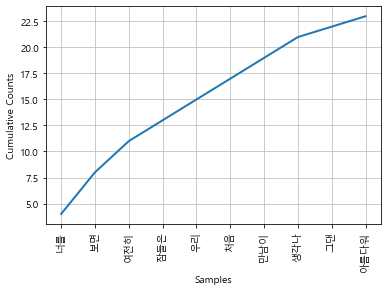

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [18]:
fdist.plot(cumulative=True)

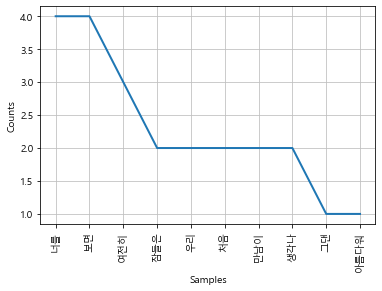

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
fdist.plot()